<a href="https://colab.research.google.com/github/ramafadilah17/ramafadilah17.github.io/blob/main/Hands-On%20-%20Regression%20%26%20Model%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas 1



In [ ]:
# kita akan import pandas terlebih dahulu agar dataset dapat terbaca

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LinearRegression


In [ ]:
#selanjutnya import dataset, dataset didapatkan dari kagle

df = pd.read_csv('dataset_1.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# jika ingin mengetahui berapa jumlah row dan kolom cukup masukan formula di bawah ini :

df.shape

(1460, 81)

In [ ]:
# masukan formula di bawah maka kita akan mengetahui apakah ada data yang missing atau tidak

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# ternyata terdapat beberapa data yang kosong atau NaN

In [ ]:
# kita akan menghapus beberapa kolom yang datanya kosong dengan formula di bawah ini :

df = df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500


In [ ]:
# kita cek lagi jika ada data yang missing, ternyata ada beberapa data lagi yang missing

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
# jika di cek ada sejumlah data yang missing

df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

In [ ]:
# kita akan drop row nya, nantinya jumlah semua data akan sama mengikuti jumlah row terkecil nya

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1094 non-null   int64  
 1   MSSubClass     1094 non-null   int64  
 2   MSZoning       1094 non-null   object 
 3   LotFrontage    1094 non-null   float64
 4   LotArea        1094 non-null   int64  
 5   Street         1094 non-null   object 
 6   LotShape       1094 non-null   object 
 7   LandContour    1094 non-null   object 
 8   Utilities      1094 non-null   object 
 9   LotConfig      1094 non-null   object 
 10  LandSlope      1094 non-null   object 
 11  Neighborhood   1094 non-null   object 
 12  Condition1     1094 non-null   object 
 13  Condition2     1094 non-null   object 
 14  BldgType       1094 non-null   object 
 15  HouseStyle     1094 non-null   object 
 16  OverallQual    1094 non-null   int64  
 17  OverallCond    1094 non-null   int64  
 18  YearBuil

In [ ]:
# masukan formula di bawah untuk mengetahui nilai statistika nya seperti mean, modus, median dll

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1094.0,727.375686,420.955488,1.0,366.50,723.5,1093.75,1460.0
MSSubClass,1094.0,56.128885,41.976345,20.0,20.00,50.0,70.00,190.0
LotFrontage,1094.0,70.759598,24.508859,21.0,60.00,70.0,80.00,313.0
LotArea,1094.0,10132.346435,8212.249621,1300.0,7606.75,9444.5,11387.25,215245.0
OverallQual,1094.0,6.247715,1.366797,2.0,5.00,6.0,7.00,10.0
OverallCond,1094.0,5.575868,1.066500,2.0,5.00,5.0,6.00,9.0
YearBuilt,1094.0,1972.412249,31.189752,1880.0,1953.00,1975.0,2003.00,2010.0
YearRemodAdd,1094.0,1985.915905,20.930772,1950.0,1967.00,1995.0,2005.00,2010.0
MasVnrArea,1094.0,109.855576,190.667459,0.0,0.00,0.0,171.75,1600.0
BsmtFinSF1,1094.0,448.191956,468.728095,0.0,0.00,384.5,712.75,5644.0


In [ ]:
# kita pilih 2 kolom untuk dijadikan prediksi dan salah satu nya adalah target variabel

data = df[['LotArea','SalePrice']]
data.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


Text(0, 0.5, 'Sale_price')

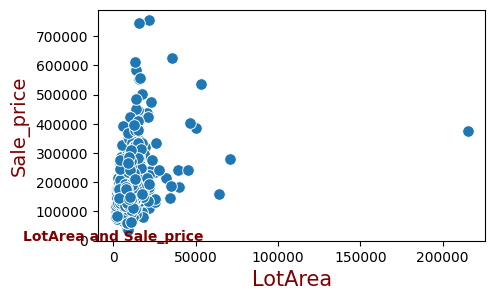

In [ ]:
# untuk melihat bagaimana bentuk plot nya kita masukan formula di bawah ini

fig, ax = plt.subplots(figsize=(5,3))
sns.scatterplot(x='LotArea', y='SalePrice', data=data, s=70)

title = 'LotArea and Sale_price'
ax.text(45,26,title,horizontalalignment='center',color='#800000',fontsize=10,fontweight='bold')

ax.set_xlabel('LotArea', fontsize=15, color='#800000')
ax.set_ylabel('Sale_price', fontsize=14, color='#800000')

In [ ]:
# kita rubah nama kolom nya menjadi x dan y untuk memudahkan pengolahan data

data.columns = ['x','y']
data.head()

,x,y
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [ ]:
# karena kita akan mencari nilai regresi nya, masukan formula di bawah ini agar kita mengetahui nilai x mean, y mean, X mean*y mean, X mean*y mean*2

data['(x-x_mean)'] = round(data['x'] - data['x'].mean(),2)
data['(y-y_mean)'] = round(data['y'] - data['y'].mean(),2)
data['(x-x_mean)(y-y_mean)'] = data['(x-x_mean)'] * data['(y-y_mean)']
data['pow((x-x_mean),2)'] = round(pow(data['x'] - data['x'].mean(),2),2)
data.head()

,x,y,(x-x_mean),(y-y_mean),(x-x_mean)(y-y_mean),"pow((x-x_mean),2)"
0,8450,208500,-1682.35,21466.74,-3.611457e+07,2830289.53
1,9600,181500,-532.35,-5533.26,2.945631e+06,283392.73
2,11250,223500,1117.65,36466.74,4.075705e+07,1249149.49
3,9550,140000,-582.35,-47033.26,2.738982e+07,339127.37
4,14260,250000,4127.65,62966.74,2.599047e+08,17037523.95


In [ ]:
# masukan formula di bawah untuk mengetahui nilai b1, nilai ini nantinya di pakai untuk mengathui rumus regresi nya

b1 = data['(x-x_mean)(y-y_mean)'].sum() / data['pow((x-x_mean),2)'].sum()
b1

3.0610639613837707

In [ ]:
# masukan formula di bawah untuk mengetahui nilai b0, nilai ini nantinya di pakai untuk mengathui rumus regresi nya

b0 = data['y'].mean() - b1 * data['x'].mean()
b0

156017.50273737175

In [ ]:
# masukan formula di bawah untuk mengetahui rumus regresinya, rumus ini nantinya digunakan melihat prediksi harga penjualan rumah bentuk rumusnya yaitu y = a + bx

textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
textstr

'y = 156017.50273737175 + 3.0610639613837707 * x'

In [ ]:
data['y_pred'] = b0 + b1*data['x']
data.head()

,x,y,(x-x_mean),(y-y_mean),(x-x_mean)(y-y_mean),"pow((x-x_mean),2)",y_pred
0,8450,208500,-1682.35,21466.74,-3.611457e+07,2830289.53,181883.493211
1,9600,181500,-532.35,-5533.26,2.945631e+06,283392.73,185403.716767
2,11250,223500,1117.65,36466.74,4.075705e+07,1249149.49,190454.472303
3,9550,140000,-582.35,-47033.26,2.738982e+07,339127.37,185250.663569
4,14260,250000,4127.65,62966.74,2.599047e+08,17037523.95,199668.274827


Text(0, 0.5, 'SalePrice')

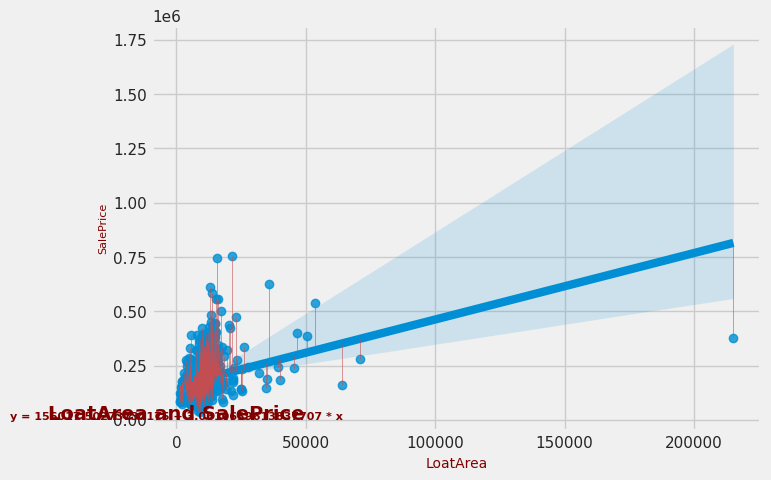

In [ ]:
fit = np.polyfit(data['x'], data['y'], deg=1)
y_hat = fit[1] + data['x'] * fit[0]

fig, ax = plt.subplots(figsize=(7,5))
sns.regplot(x='x', y='y', data=data)
plt.vlines(data['x'], y_hat, data['y'], lw = .4, colors='r');

title = 'LoatArea and SalePrice'
ax.text(10,10,title,horizontalalignment='center',color='#800000',fontsize=14,fontweight='bold')
ax.text(10,10,textstr,horizontalalignment='center',color='#800000',fontsize=8,fontweight='bold')
ax.set_xlabel('LoatArea', fontsize=10, color='#800000')
ax.set_ylabel('SalePrice', fontsize=8, color='#800000')

Tugas 2

In [ ]:
# kita akan import pandas terlebih dahulu agar dataset dapat terbaca

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [ ]:
#selanjutnya import dataset, dataset didapatkan dari kagle

df = pd.read_csv('dataset_2.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# jika ingin mengetahui berapa jumlah row dan kolom cukup masukan formula di bawah ini :

df.shape

(200, 5)

In [ ]:
# masukan formula di bawah maka kita akan mengetahui apakah ada data yang missing atau tidak

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# ternyata tidak ada data yang missing

In [ ]:
# jika di cek tidak ada data yang missing

df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
cluster           0
dtype: int64

In [ ]:
# jika di cek duplakasi data juga tidak ada data yang sama atau duplicate

df.duplicated().sum()

0

In [ ]:
# kita akan menghilangkan tanda k$ di Annual Income dan tanda (1-100) di Spending Score dengan menggunakan formula di bawah

df = df.rename(columns={'Annual Income (k$)': 'Annual Income','Spending Score (1-100)':
'Spending Score'})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# masukan formula di bawah untuk mengetahui nilai statistika nya seperti mean, modus, median dll

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.500,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.850,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income,200.0,60.560,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score,200.0,50.200,25.823522,1.0,34.75,50.0,73.00,99.0
cluster,200.0,1.585,1.228953,0.0,1.00,1.0,2.00,4.0


<Axes: >

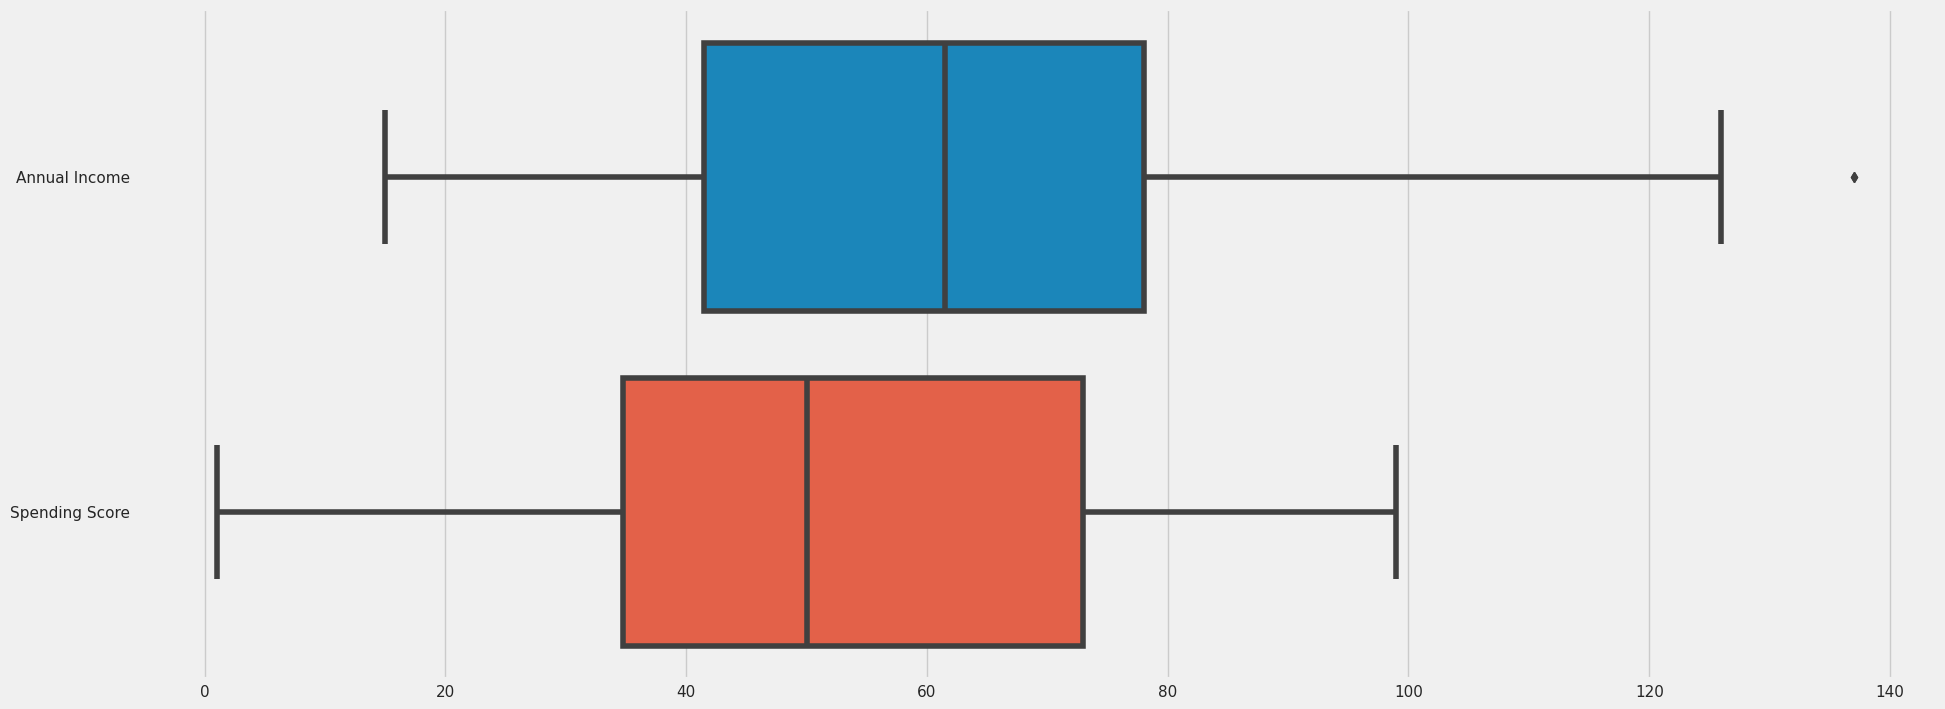

In [ ]:
# masukan formula di bawah untuk mengetahui bagaimana bentuk boxplot nya dan cek apakah data yang outlier

sns.boxplot(data=df[["Annual Income", "Spending Score"]], orient="h")

In [ ]:
# ternyata ada data yang outlier pada kolom Annual Income

<Axes: xlabel='Annual Income', ylabel='Spending Score'>

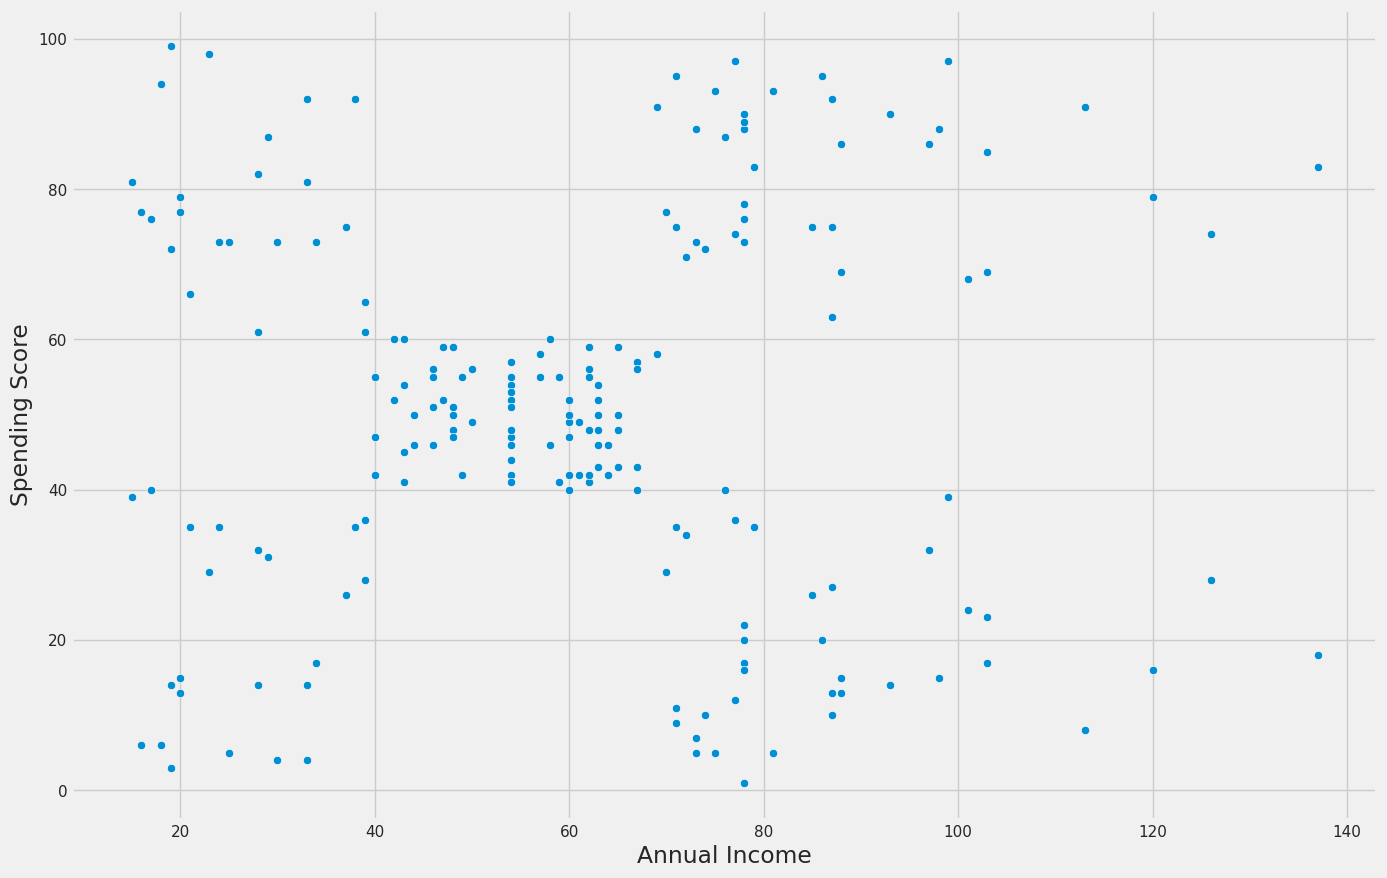

In [ ]:
# untuk melihat bagaimana bentuk scatterplot nya gunakan formula di bawah ini

fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='Annual Income', y='Spending Score')

In [ ]:
# untuk melihat bagaimana standarisasi fiturnya kita masukan formula di bawah ini

feats = ['Annual Income', 'Spending Score']
X = df[feats].values
y = df[feats].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,Annual Income,Spending Score
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


<Axes: >

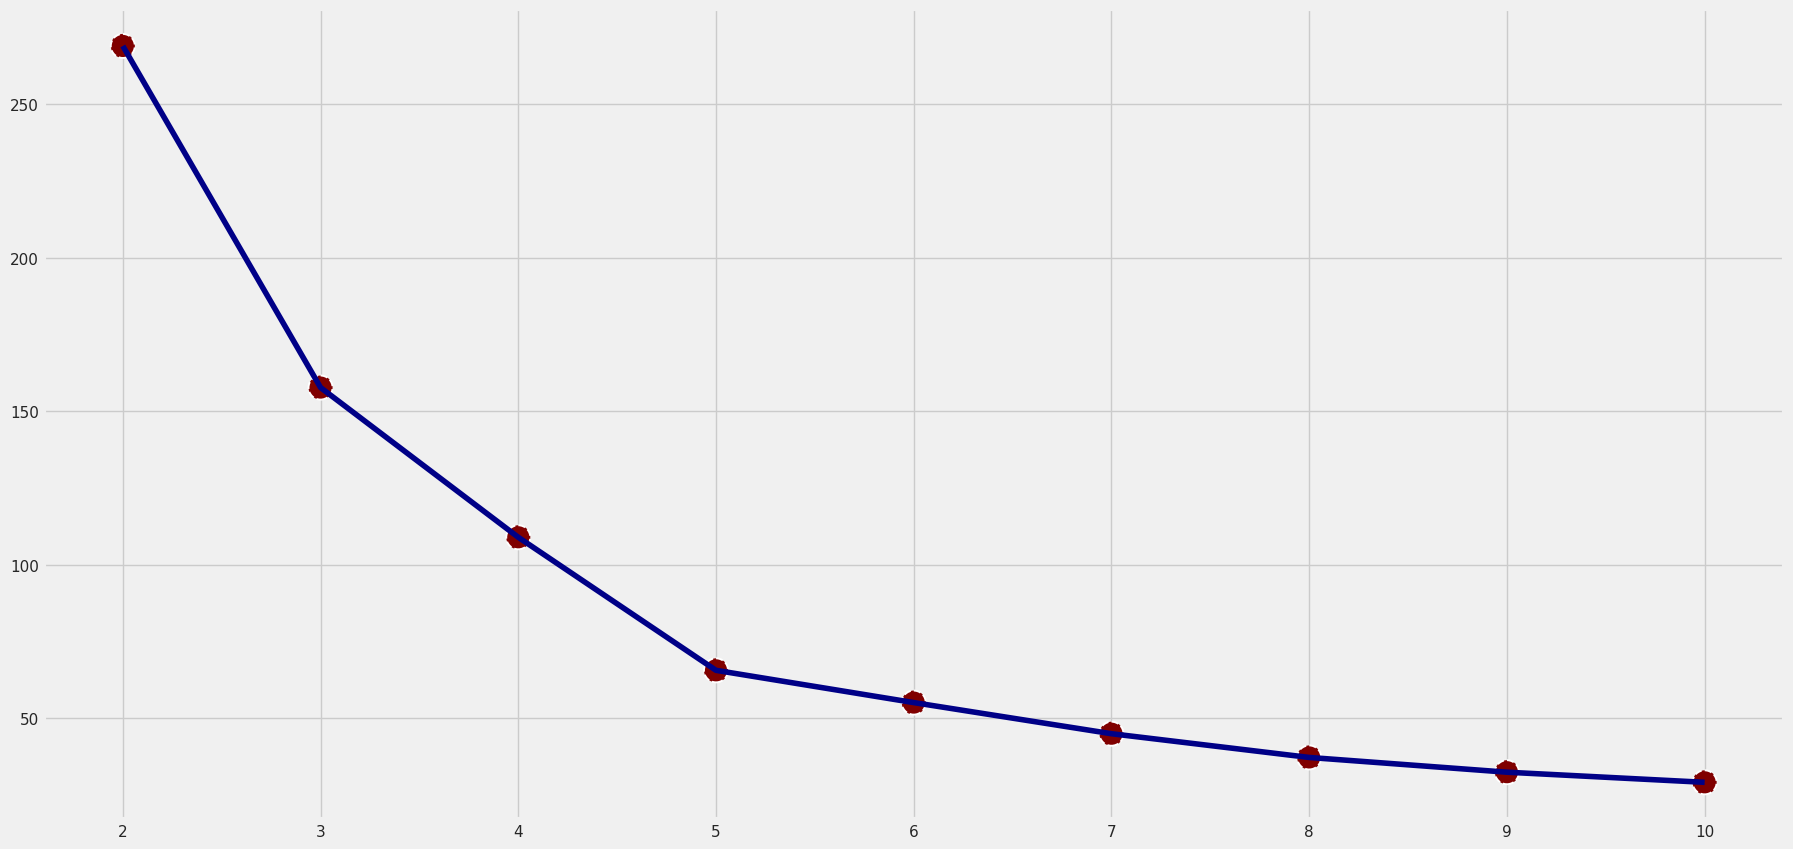

In [ ]:
# untuk melihat elbow method kita gunakan formula di bawah ini

from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(new_df.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


In [ ]:
# jika dilihat drop poin nya ada di angka 5 karena dari 5 dan seterunya itu langsung lurus, maka cluster 5 adalah kandidat yang optimal

In [ ]:
# untuk melihat silhouette_score, kita gunakan formula di bawah ini

from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(new_df)
    preds = kmeans.predict(new_df)

    score_euclidean = silhouette_score(new_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

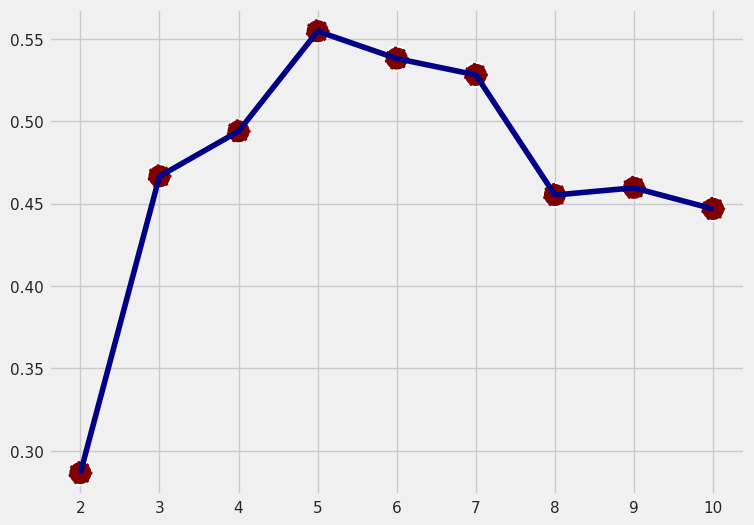

In [ ]:
# masukan formula di bawah untuk melihat bagaiman bentuk silhouette score nya

fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

In [ ]:
# jika dilihat dari silhouette_score, kita lihat titik pucak nya, ternyata titik puncak berada di angka 5 jadi optimal cluster 5

In [ ]:
# untuk melihat nilai cluster menggunakan kmeans kita gunakan formula di bawah

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=5, random_state=0)

In [ ]:
df[feats] = y

In [ ]:
df['cluster_5'] = kmeans.labels_

<Axes: xlabel='Annual Income', ylabel='Spending Score'>

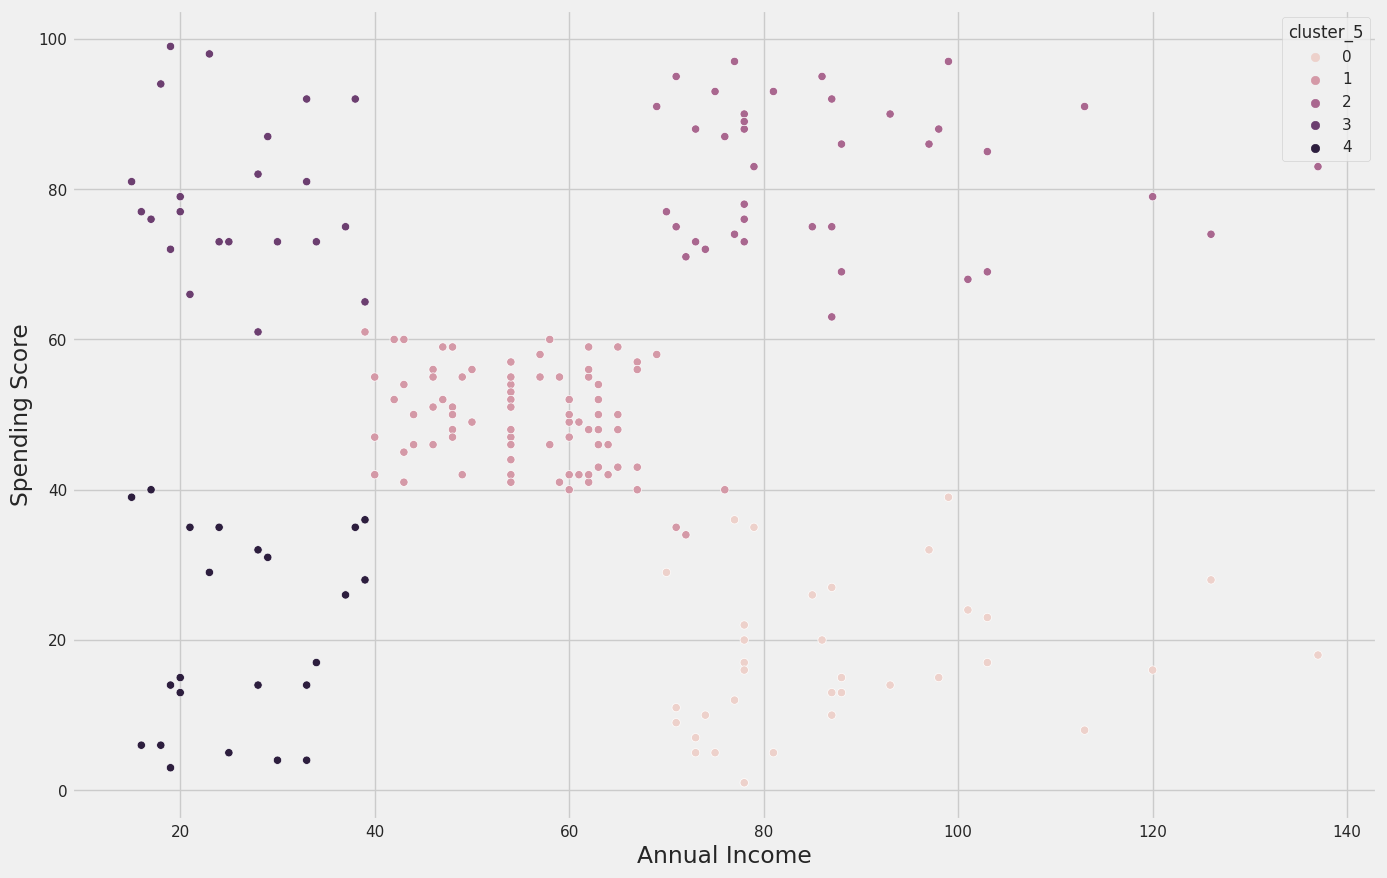

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='Annual Income', y='Spending Score',
                hue='cluster_5')

In [ ]:
# bisa diihat data terbagi ke dalam 5 cluster dengan ditandai oleh 5 warna yang berbeda

In [ ]:
display(df.groupby('cluster_5').agg(['mean']))

,CustomerID,Age,Annual Income,Spending Score,cluster
,mean,mean,mean,mean,mean
cluster_5,,,,,
0,164.371429,41.114286,88.200000,17.114286,0.0
1,86.320988,42.716049,55.296296,49.518519,1.0
2,162.000000,32.692308,86.538462,82.128205,2.0
3,23.090909,25.272727,25.727273,79.363636,3.0
4,23.000000,45.217391,26.304348,20.913043,4.0


In [ ]:
# kita fokus ke kolom Annual Income dan Spending Score
# label 0 : tinnginya annual income tidak menjamin spending score yang diberikan tinngi
# label 1 : annual income yang di dapat membuat spending score yang diberikan cukup tinggi
# label 2 : tingginya annuak income membuat spending score yang diberikan juga tinggi
# label 3 : walaupun annual income yang di dapat rendah tapi spending score yang diberikan tinggi
# label 4 : annual income yang di dapat rendah membuat spending score yang diberikan juga rendah

In [ ]:
display(df.groupby('cluster_5').agg(['count']))

,CustomerID,Gender,Age,Annual Income,Spending Score,cluster
,count,count,count,count,count,count
cluster_5,,,,,,
0,35,35,35,35,35,35
1,81,81,81,81,81,81
2,39,39,39,39,39,39
3,22,22,22,22,22,22
4,23,23,23,23,23,23
